In [16]:
import pyspark 
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('bankspark').getOrCreate()

df = spark.read.format("csv").option("header", "true").option("delimiter", ";").load("bank.csv")
df.show(4)

+---+----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
|age|       job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
| 30|unemployed|married|  primary|     no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|
| 33|  services|married|secondary|     no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure| no|
| 35|management| single| tertiary|     no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure| no|
| 30|management|married| tertiary|     no|   1476|    yes| yes| unknown|  3|  jun|     199|       4|   -1|       0| unknown| no|
+---+----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+------

In [17]:
cols = ['age', 'job', 'marital','education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df2 = df.select(cols)
df2.show(4)

+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+---+
|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|  y|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+---+
| 30|unemployed|married|  primary|     no|   1787|     no|  no|       1|   -1|       0| unknown| no|
| 33|  services|married|secondary|     no|   4789|    yes| yes|       1|  339|       4| failure| no|
| 35|management| single| tertiary|     no|   1350|    yes|  no|       1|  330|       1| failure| no|
| 30|management|married| tertiary|     no|   1476|    yes| yes|       4|   -1|       0| unknown| no|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+---+
only showing top 4 rows



In [20]:
df2.filter(~(df2.age>=4))

DataFrame[age: string, job: string, marital: string, education: string, default: string, balance: string, housing: string, loan: string, campaign: string, pdays: string, previous: string, poutcome: string, y: string]

In [4]:
df2.createOrReplaceTempView("bank")
df2 = spark.sql("SELECT * FROM bank WHERE bank.poutcome='success' or bank.poutcome='failure'")
df2.createOrReplaceTempView("bank")
df2 =  df2.filter(~df.age.contains("unknown"))
df2 =  df2.filter(~df.job.contains("unknown"))
df2 =  df2.filter(~df.marital.contains("unknown"))
df2 =  df2.filter(~df.education.contains("unknown"))
df2 =  df2.filter(~df.default.contains("unknown"))
df2 =  df2.filter(~df.balance.contains("unknown"))
df2 =  df2.filter(~df.housing.contains("unknown"))
df2 =  df2.filter(~df.loan.contains("unknown"))
df2 =  df2.filter(~df.campaign.contains("unknown"))
df2 =  df2.filter(~df.pdays.contains("unknown"))
df2 =  df2.filter(~df.previous.contains("unknown"))
df2 =  df2.filter(~df.poutcome.contains("unknown"))
df2 =  df2.filter(~df.y.contains("unknown"))
df2.show(4)

+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+---+
|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|  y|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+---+
| 33|  services|married|secondary|     no|   4789|    yes| yes|       1|  339|       4| failure| no|
| 35|management| single| tertiary|     no|   1350|    yes|  no|       1|  330|       1| failure| no|
| 35|management| single| tertiary|     no|    747|     no|  no|       2|  176|       3| failure| no|
| 43|  services|married|  primary|     no|    -88|    yes| yes|       1|  147|       2| failure| no|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+---+
only showing top 4 rows



In [5]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder

stringIndexer = StringIndexer(inputCol="job", outputCol="job_index")
model = stringIndexer.fit(df2)
indexed = model.transform(df2)
encoder = OneHotEncoder(dropLast=False, inputCol="job_index", outputCol="job_vec")
encoded = encoder.transform(indexed)
df2 = encoded

stringIndexer = StringIndexer(inputCol="marital", outputCol="marital_index")
model = stringIndexer.fit(df2)
indexed = model.transform(df2)
encoder = OneHotEncoder(dropLast=False, inputCol="marital_index", outputCol="marital_vec")
encoded = encoder.transform(indexed)
df2 = encoded

stringIndexer = StringIndexer(inputCol="education", outputCol="education_index")
model = stringIndexer.fit(df2)
indexed = model.transform(df2)
encoder = OneHotEncoder(dropLast=False, inputCol="education_index", outputCol="education_vec")
encoded = encoder.transform(indexed)
df2 = encoded

stringIndexer = StringIndexer(inputCol="default", outputCol="default_index")
model = stringIndexer.fit(df2)
indexed = model.transform(df2)
encoder = OneHotEncoder(dropLast=False, inputCol="default_index", outputCol="default_vec")
encoded = encoder.transform(indexed)
df2 = encoded

stringIndexer = StringIndexer(inputCol="housing", outputCol="housing_index")
model = stringIndexer.fit(df2)
indexed = model.transform(df2)
encoder = OneHotEncoder(dropLast=False, inputCol="housing_index", outputCol="housing_vec")
encoded = encoder.transform(indexed)
df2 = encoded

stringIndexer = StringIndexer(inputCol="loan", outputCol="loan_index")
model = stringIndexer.fit(df2)
indexed = model.transform(df2)
encoder = OneHotEncoder(dropLast=False, inputCol="loan_index", outputCol="loan_vec")
encoded = encoder.transform(indexed)
df2 = encoded

stringIndexer = StringIndexer(inputCol="poutcome", outputCol="poutcome_index")
model = stringIndexer.fit(df2)
indexed = model.transform(df2)
encoder = OneHotEncoder(dropLast=False, inputCol="poutcome_index", outputCol="poutcome_vec")
encoded = encoder.transform(indexed)
df2 = encoded

stringIndexer = StringIndexer(inputCol="y", outputCol="y_index")
model = stringIndexer.fit(df2)
indexed = model.transform(df2)
encoder = OneHotEncoder(dropLast=False, inputCol="y_index", outputCol="y_vec")
encoded = encoder.transform(indexed)
df2 = encoded

df2.show(4)

22/06/22 17:22:21 WARN Utils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.debug.maxToStringFields' in SparkEnv.conf.


+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+---+---------+--------------+-------------+-------------+---------------+-------------+-------------+-------------+-------------+-------------+----------+-------------+--------------+-------------+-------+-------------+
|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|  y|job_index|       job_vec|marital_index|  marital_vec|education_index|education_vec|default_index|  default_vec|housing_index|  housing_vec|loan_index|     loan_vec|poutcome_index| poutcome_vec|y_index|        y_vec|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+---+---------+--------------+-------------+-------------+---------------+-------------+-------------+-------------+-------------+-------------+----------+-------------+--------------+-------------+-------+-------------+
| 33|  services|married|secondary|     no|   4789|  

In [6]:
from pyspark.ml.feature import MinMaxScaler

cols = ['job', 'marital','education', 'default', 'housing', 'loan', 'poutcome', 'y']
for col in cols:
    scaler = MinMaxScaler(inputCol=col+"_vec", outputCol=col+"_vec_scaled")
    scalerModel = scaler.fit(df2)
    scaledData = scalerModel.transform(df2)
    df2 = scaledData
df2.show(4)

+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+---+---------+--------------+-------------+-------------+---------------+-------------+-------------+-------------+-------------+-------------+----------+-------------+--------------+-------------+-------+-------------+--------------------+------------------+--------------------+------------------+------------------+---------------+-------------------+------------+
|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|  y|job_index|       job_vec|marital_index|  marital_vec|education_index|education_vec|default_index|  default_vec|housing_index|  housing_vec|loan_index|     loan_vec|poutcome_index| poutcome_vec|y_index|        y_vec|      job_vec_scaled|marital_vec_scaled|education_vec_scaled|default_vec_scaled|housing_vec_scaled|loan_vec_scaled|poutcome_vec_scaled|y_vec_scaled|
+---+----------+-------+---------+-------+-------+-------+----+--------+

In [7]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

vecAssembler = VectorAssembler(inputCols=[ 'job_vec_scaled', 'marital_vec_scaled','education_vec_scaled', 'default_vec_scaled', 'housing_vec_scaled', 'loan_vec_scaled', 'poutcome_vec_scaled'], outputCol='features')
df3 = vecAssembler.transform(df2)
df3.show(4)

+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+---+---------+--------------+-------------+-------------+---------------+-------------+-------------+-------------+-------------+-------------+----------+-------------+--------------+-------------+-------+-------------+--------------------+------------------+--------------------+------------------+------------------+---------------+-------------------+------------+--------------------+
|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|  y|job_index|       job_vec|marital_index|  marital_vec|education_index|education_vec|default_index|  default_vec|housing_index|  housing_vec|loan_index|     loan_vec|poutcome_index| poutcome_vec|y_index|        y_vec|      job_vec_scaled|marital_vec_scaled|education_vec_scaled|default_vec_scaled|housing_vec_scaled|loan_vec_scaled|poutcome_vec_scaled|y_vec_scaled|            features|
+---+----------+-------+------

In [8]:
kmeans = KMeans(k=2, seed=1)
model = kmeans.fit(df3.select("features"))
transformed = model.transform(df3)
transformed.show(4)

22/06/22 17:24:36 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/06/22 17:24:36 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+---+---------+--------------+-------------+-------------+---------------+-------------+-------------+-------------+-------------+-------------+----------+-------------+--------------+-------------+-------+-------------+--------------------+------------------+--------------------+------------------+------------------+---------------+-------------------+------------+--------------------+----------+
|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|  y|job_index|       job_vec|marital_index|  marital_vec|education_index|education_vec|default_index|  default_vec|housing_index|  housing_vec|loan_index|     loan_vec|poutcome_index| poutcome_vec|y_index|        y_vec|      job_vec_scaled|marital_vec_scaled|education_vec_scaled|default_vec_scaled|housing_vec_scaled|loan_vec_scaled|poutcome_vec_scaled|y_vec_scaled|            features|prediction|
+---+---

22/06/22 17:24:50 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
22/06/22 17:24:50 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


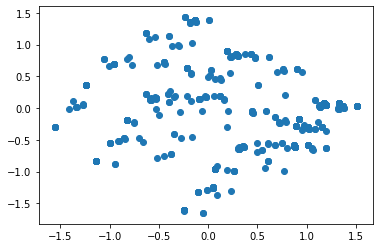

In [9]:
from pyspark.ml.feature import PCA
import matplotlib.pyplot as plt


pca = PCA(k=2, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(df3)

result = model.transform(df3).select("pcaFeatures")
pandasDf = result.toPandas()
dataX = []
dataY = []
for vec in pandasDf.values:
    dataX.extend([vec[0][0]])
    dataY.extend([vec[0][1]])
plt.scatter(dataX, dataY)
plt.show()

/home/algo_dev/anaconda3/envs/py37_lgb3.2.1/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


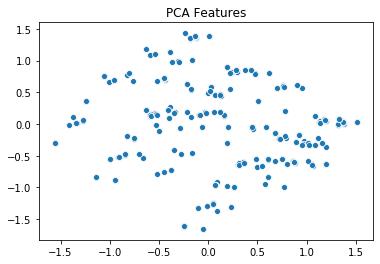

In [10]:
import seaborn as sns
sns.scatterplot(dataX, dataY)
plt.title('PCA Features')
plt.show()